In [1]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from DeepPurpose import utils, models, dataset

In [ ]:
import numpy as np
import pandas as pd
import json
import os 
print(os.path.abspath('.'))

In [4]:
affinity = pd.read_csv('affinity.txt', header=None, sep = '\t')
affinity = affinity.fillna(-1)

with open('target_seq.txt') as f:
    target = json.load(f)

with open('SMILES.txt') as f:
    drug = json.load(f)

target = list(target.values())
drug = list(drug.values())

SMILES = []
Target_seq = []
y = []

for i in range(len(drug)):
    for j in range(len(target)):
        if affinity.values[i, j] != -1:
            SMILES.append(drug[i])
            Target_seq.append(target[j])
            y.append(affinity.values[i, j])

Smile, Target, y = np.array(SMILES), np.array(Target_seq), np.array(y)
print('Done!')

Done!


In [5]:
df_data = pd.DataFrame(zip(Smile, Target, y))
df_data.rename(columns={0:'SMILES',
						1: 'Target_Sequence',
						2: 'Label'}, 
						inplace=True)
print('in total: ' + str(len(df_data)) + ' drug-target pairs')

in total: 118254 drug-target pairs


In [6]:
df_data.head()

,SMILES,Target_Sequence,Label
0,COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,11.1
1,COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl,MSWSPSLTTQTCGAWEMKERLGTGGFGNVIRWHNQETGEQIAIKQC...,11.1
2,COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl,MERPPGLRPGAGGPWEMRERLGTGGFGNVCLYQHRELDLKIAIKSC...,11.1
3,COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,11.1
4,COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl,MELAALCRWGLLLALLPPGAASTQVCTGTDMKLRLPASPETHLDML...,11.1


In [7]:
y_cal = [1 if i else 0 for i in df_data.Label.values > 12.1]

In [8]:
y_cal2 = np.array(y_cal)

In [10]:
# replace y with y_cal2
X_drugs, X_targets, y = Smile, Target, y_cal2
print('Drug 1: ' + X_drugs[0])
print('Target 1: ' + X_targets[0])
print('Score 1: ' + str(y[0]))

Drug 1: COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl
Target 1: MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNSYACKHPEVQSILKISQPQEPELMNANPSPPPSPSQQINLGPSSNPHAKPSDFHFLKVIGKGSFGKVLLARHKAEEVFYAVKVLQKKAILKKKEEKHIMSERNVLLKNVKHPFLVGLHFSFQTADKLYFVLDYINGGELFYHLQRERCFLEPRARFYAAEIASALGYLHSLNIVYRDLKPENILLDSQGHIVLTDFGLCKENIEHNSTTSTFCGTPEYLAPEVLHKQPYDRTVDWWCLGAVLYEMLYGLPPFYSRNTAEMYDNILNKPLQLKPNITNSARHLLEGLLQKDRTKRLGAKDDFMEIKSHVFFSLINWDDLINKKITPPFNPNVSGPNDLRHFDPEFTEEPVPNSIGKSPDSVLVTASVKEAAEAFLGFSYAPPTDSFL
Score 1: 0


In [11]:
drug_encoding, target_encoding = 'Morgan', 'CNN'

In [12]:
train, val, test = utils.data_process(X_drugs, X_targets, y, 
                                drug_encoding, target_encoding, 
                                split_method='train_full',frac=[0.8,0.1,0.1],
                                random_seed = 1)
train.head(1)

Drug Target Interaction Prediction Mode...
in total: 118254 drug-target pairs
encoding drug...
unique drugs: 2068
encoding protein...
unique target sequence: 229
splitting dataset...
Done.


,SMILES,Target Sequence,Label,drug_encoding,target_encoding
0,COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[M, T, V, K, T, E, A, A, K, G, T, L, T, Y, S, ..."


In [13]:
# use pre-trained model
#model = models.model_pretrained(path_dir = './')
#model.config

In [14]:

config = utils.generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 50, 
                         test_every_X_epoch = 10, 
                         LR = 0.001, 
                         #decay = 0.001,
                         batch_size = 512,
                         #hidden_dim_drug = 128,
                         #mpnn_hidden_size = 128,
                         #mpnn_depth = 4, 
                         cnn_target_filters = [32,64,96],
                         cnn_target_kernels = [4,8,12],
                         num_workers = 10
                              )


In [15]:
model = models.model_initialize(**config)

In [ ]:
model.config

In [16]:
#model.config['train_epoch'] = 50

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.68065. Total time 0.00027 hours
Training at Epoch 1 iteration 100 with loss 0.38657. Total time 0.0125 hours
Training at Epoch 1 iteration 200 with loss 0.34387. Total time 0.025 hours
Validation at Epoch 1 , AUROC: 0.86271 , AUPRC: 0.65409 , F1: 0.48523
Training at Epoch 2 iteration 0 with loss 0.33759. Total time 0.03138 hours
Training at Epoch 2 iteration 100 with loss 0.35265. Total time 0.04388 hours
Training at Epoch 2 iteration 200 with loss 0.34033. Total time 0.05611 hours
Validation at Epoch 2 , AUROC: 0.87012 , AUPRC: 0.66987 , F1: 0.59581
Training at Epoch 3 iteration 0 with loss 0.33387. Total time 0.0625 hours
Training at Epoch 3 iteration 100 with loss 0.37164. Total time 0.075 hours
Training at Epoch 3 iteration 200 with loss 0.30311. Total time 0.08722 hours
Validation at Epoch 3 , AUROC: 0.89362 , AUPRC: 0.72442 , F1: 0.60005
Training at Epoch 4 iteration 0 wi

Validation at Epoch 27 , AUROC: 0.97868 , AUPRC: 0.93232 , F1: 0.84075
Training at Epoch 28 iteration 0 with loss 0.12651. Total time 0.83944 hours
Training at Epoch 28 iteration 100 with loss 0.15408. Total time 0.85194 hours
Training at Epoch 28 iteration 200 with loss 0.15303. Total time 0.86416 hours
Validation at Epoch 28 , AUROC: 0.98104 , AUPRC: 0.93807 , F1: 0.84310
Training at Epoch 29 iteration 0 with loss 0.13076. Total time 0.87055 hours
Training at Epoch 29 iteration 100 with loss 0.15908. Total time 0.88305 hours
Training at Epoch 29 iteration 200 with loss 0.12110. Total time 0.89527 hours
Validation at Epoch 29 , AUROC: 0.98146 , AUPRC: 0.93641 , F1: 0.84980
Training at Epoch 30 iteration 0 with loss 0.13549. Total time 0.90166 hours
Training at Epoch 30 iteration 100 with loss 0.14137. Total time 0.91388 hours
Training at Epoch 30 iteration 200 with loss 0.13157. Total time 0.92638 hours
Validation at Epoch 30 , AUROC: 0.98381 , AUPRC: 0.94519 , F1: 0.85482
Training at

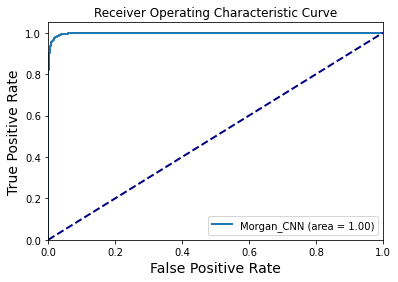

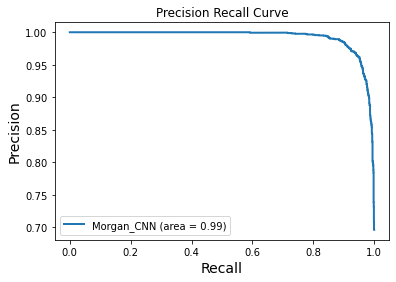

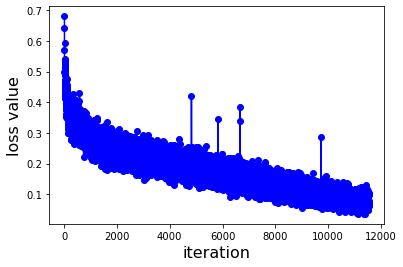

In [17]:
model.train(train, val, test)

In [18]:
model.save_model('./model_MORGAN_CNN_KIBA_CLA')